In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from google.colab import files
uploaded=files.upload()
df=pd.read_csv('/content/samplebankloandata.csv')

Saving samplebankloandata.csv to samplebankloandata (1).csv


In [ ]:
print(df.head())
print(df.tail())
print(df.isnull().sum())

        id  year    issue_d  final_d  emp_length_int home_ownership  \
0  1077501  2011  12/1/2011  1012015            10.0           RENT   
1  1077430  2011  12/1/2011  1042013             0.5           RENT   
2  1077175  2011  12/1/2011  1062014            10.0           RENT   
3  1076863  2011  12/1/2011  1012015            10.0           RENT   
4  1075358  2011  12/1/2011  1012016             1.0           RENT   

   home_ownership_cat income_category  annual_inc  income_cat  ...  \
0                   1             Low       24000           1  ...   
1                   1             Low       30000           1  ...   
2                   1             Low       12252           1  ...   
3                   1             Low       49200           1  ...   
4                   1             Low       80000           1  ...   

   loan_condition_cat interest_rate  grade grade_cat    dti   total_pymnt  \
0                   0         10.65      B         2  27.65   5861.071414  

In [ ]:
print(df.dtypes)
print(df.describe())

id                        int64
year                      int64
issue_d                  object
final_d                   int64
emp_length_int          float64
home_ownership           object
home_ownership_cat        int64
income_category          object
annual_inc                int64
income_cat                int64
loan_amount               int64
term                     object
term_cat                  int64
application_type         object
application_type_cat      int64
purpose                  object
purpose_cat               int64
interest_payments        object
interest_payment_cat      int64
loan_condition           object
loan_condition_cat        int64
interest_rate           float64
grade                    object
grade_cat                 int64
dti                     float64
total_pymnt             float64
total_rec_prncp         float64
recoveries              float64
installment             float64
region                   object
dtype: object
                 id       

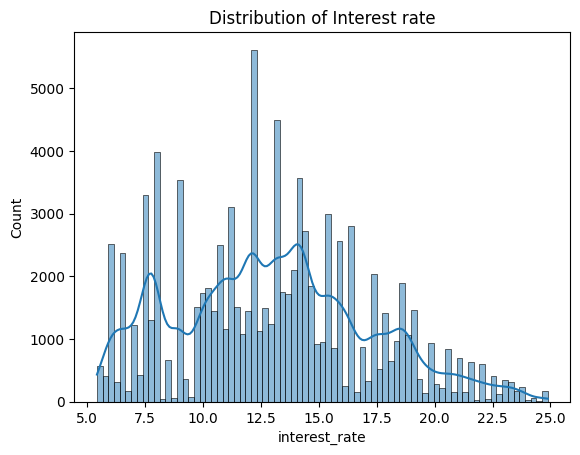

In [ ]:
sns.histplot(data=df,x='interest_rate',kde=True)
plt.title('Distribution of Interest rate')
plt.show()

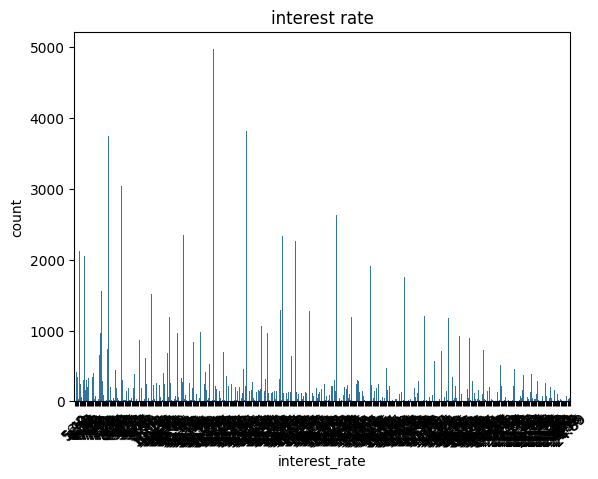

In [ ]:
sns.countplot(data=df, x='interest_rate')
plt.xticks(rotation=45)
plt.title('interest rate')
plt.show()

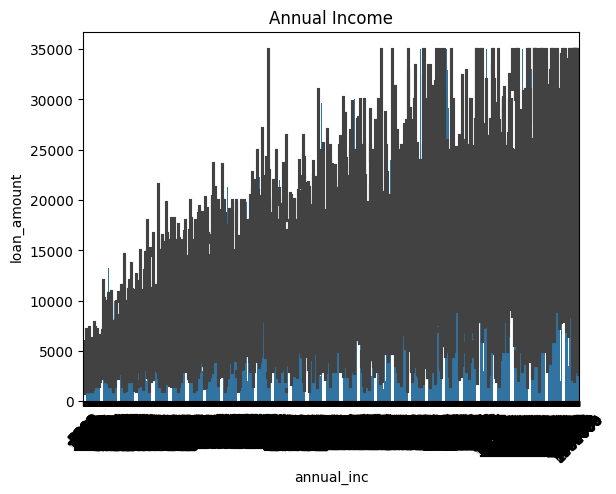

In [ ]:
sns.barplot(data=df, x='annual_inc', y='loan_amount', estimator=np.mean)
plt.xticks(rotation=45)
plt.title('Annual Income and loan_amount')
plt.show()

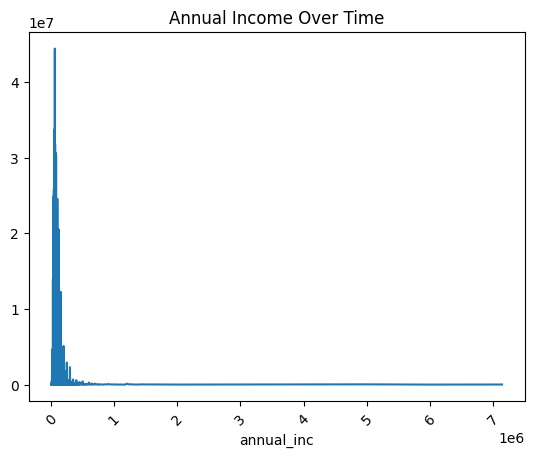

In [ ]:

df.groupby('annual_inc')['loan_amount'].sum().plot()
plt.title('Annual Income Over Time')
plt.xticks(rotation=45)
plt.show()

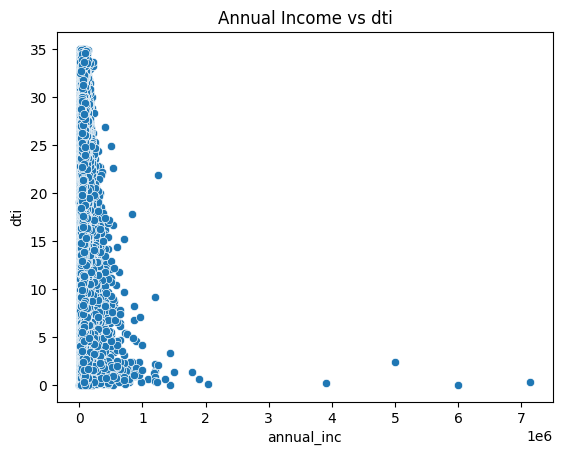

In [ ]:
sns.scatterplot(data=df, x='annual_inc', y='dti')
plt.title('Annual Income vs dti')
plt.show()

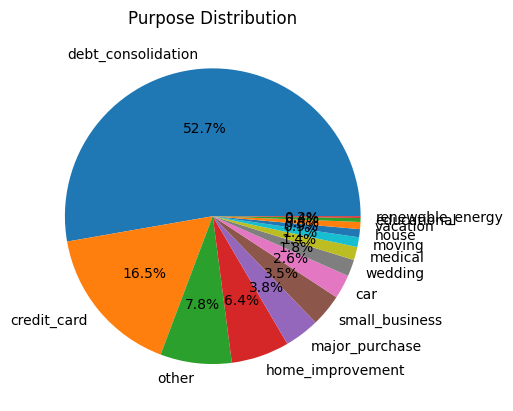

In [ ]:
plt.pie(df['purpose'].value_counts(), labels=df['purpose'].value_counts().index, autopct='%1.1f%%')
plt.title('Purpose Distribution')
plt.show()

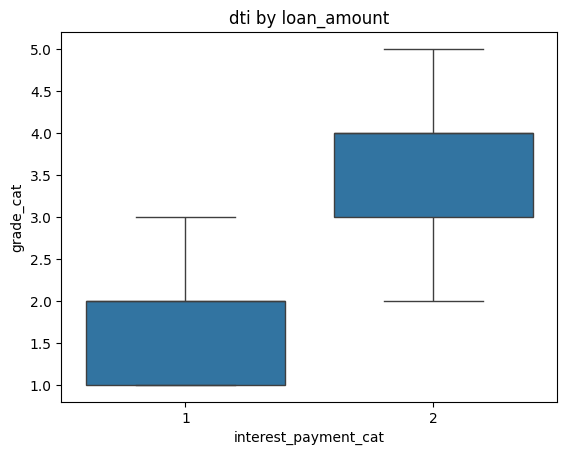

In [ ]:
sns.boxplot(data=df, x='interest_payment_cat', y='grade_cat', showfliers=False)
plt.title('dti by loan_amount')
plt.show()

In [ ]:
import plotly.express as px

fig = px.scatter_3d(df, x='annual_inc', y='loan_amount', z='dti',
                  color='id')
fig.update_layout(scene = dict(
                    xaxis = dict(title  = 'annual_inc'),
                    yaxis = dict(title  = 'loan_amount'),
                    zaxis = dict(title  = 'dti')))
fig.show()

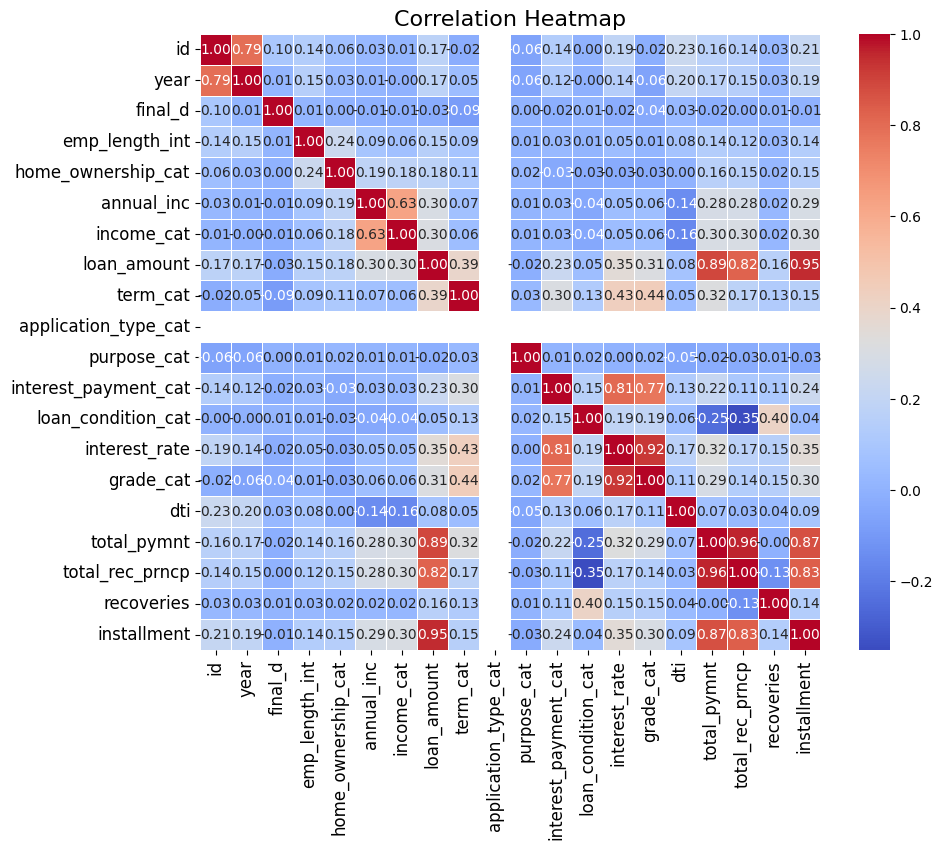

In [ ]:
numeric_df = df.select_dtypes(include=['number'])
corr = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()